In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

import density_based_clustering as db

<IPython.core.display.Javascript object>


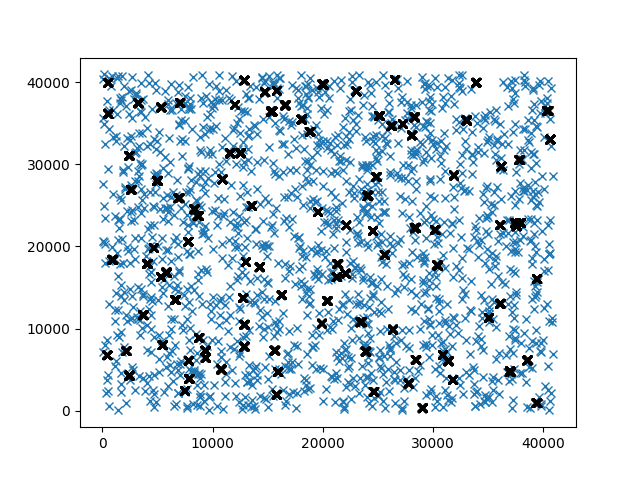

67.2984698350981
87.05235956059326
86.08605904422353
78.09118275096216
69.18228924579984
66.51017681712992
100.36274630852571
100.64833268020679
122.4379999415109
91.77845431445496
124.19966841531034
116.31176106368429
102.20222236845673
79.77972680624671
126.8516786941301
59.1227127913757
94.7101632053202
127.11462809598963
93.97957672825994
96.72916259684071
102.32450434843183
97.43352017596392
104.42329384015184
101.71326718456713
88.01644197188293
84.71371638832784
123.9752866020363
71.55751126779343
110.5331496456484
107.29830956996989
107.33329192775135
85.8991703921489
87.5191267063542
69.84022105469188
123.74370821185309
119.59208019480349
122.45709422855164
98.37101540682964
99.33077491320489
78.25635556772711
62.06687839994144
88.81057174225708
91.84575193970879
107.97049453469657
88.50795545112923
104.49717106958755
95.20070328941495
117.51298257416465
101.98907578013899
79.27554539960079
100.50786438718309
103.50973499967975
94.5572795143574
92.32058962857359
122.9573100454

In [2]:
pixel_size = 160 # nm
size = (256*pixel_size,256*pixel_size)
area = size[0]*size[1]
density = 1e-6
N = int(area * density)

bg = np.array((np.random.uniform(0,size[0],N),
                np.random.uniform(0,size[1],N)))

plt.figure()
plt.plot(bg[0,:], bg[1,:], 'x')

# num_cluster_points = 50
# cluster_radius = 100 #nm
num_clusters = 100

clusters = [bg]
for c in range(num_clusters):
    cluster_seed = np.array((np.random.uniform(0,size[0],1),
                np.random.uniform(0,size[1],1)))
    
    cluster_radius = np.random.normal(100, 20)
    print(cluster_radius)
    
    num_cluster_points = int(np.random.normal(50, 5))
    
    cluster = np.array((
                    np.random.uniform(-cluster_radius,cluster_radius,num_cluster_points),
                    np.random.uniform(-cluster_radius,cluster_radius,num_cluster_points)))

    cluster = cluster[:,np.sqrt(np.square(cluster[0,:]) + np.square(cluster[1,:])) < cluster_radius]
    cluster[0,:] = cluster[0,:] + cluster_seed[0]
    cluster[1,:] = cluster[1,:] + cluster_seed[1]
    
    clusters.append(cluster)
    plt.plot(cluster[0,:], cluster[1,:], 'kx')

    
plt.show()

<IPython.core.display.Javascript object>


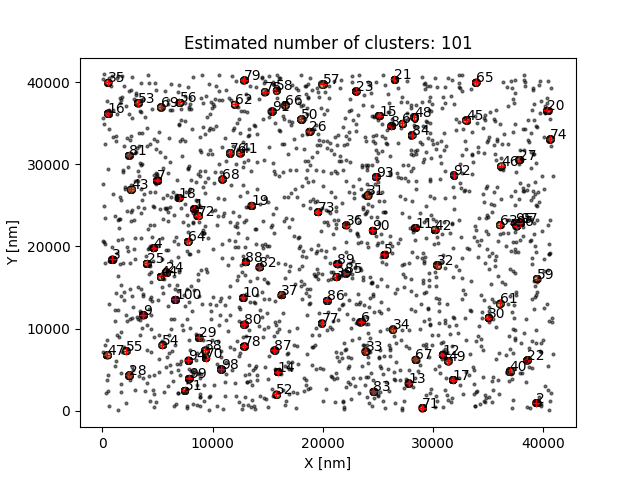

/home/daniel/.virtualenvs/SMLM_python3/lib/python3.5/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


In [4]:
min_samples = 10
X = np.hstack((clusters)).T
clust = db.optics(X, eps=105, min_samples=min_samples, metric='minkowski')
clust.extract(100, 'dbscan')

# stats
if clust.n_clusters > 0:               
    oc_df, os_df, oh_df, nn_df = db.cluster_stats(clust,X)

# plotting
core_samples_mask = np.zeros_like(clust.labels_, dtype=bool)
core_samples_mask[clust.core_sample_indices_] = True

# Black removed and is used for noise instead.
unique_labels = set(clust.labels_)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.figure()
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (clust.labels_ == k)

    xy = X[class_member_mask & core_samples_mask]
    if xy.shape[0] != 0:
        kmeans = KMeans(n_clusters=1, random_state=0).fit(xy)
        clust_center = kmeans.cluster_centers_[0]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=4, alpha=0.5)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=2, alpha=0.5)

    if k != -1: 
        plt.annotate('%d'%k,xy=(clust_center[0:2]),xycoords='data')
        plt.plot(clust_center[0],clust_center[1],'r+')

plt.title('Estimated number of clusters: %d' % len(unique_labels))
plt.xlabel('X [nm]')
plt.ylabel('Y [nm]')        
plt.show()